
# **Task 1. Daily Social Media Active Users Dataset - Exploratory Data Analysis**


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import necessary libraries**



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

In [14]:
df = pd.read_csv('/content/drive/MyDrive/cse520/Social Media Users.csv')

print("=" * 60)
print("DAILY SOCIAL MEDIA ACTIVE USERS DATASET - EDA REPORT")
print("=" * 60)


print("\n" + "=" * 50)
print("1. DATASET OVERVIEW")
print("=" * 50)

print(f"Dataset Shape: {df.shape}")
print(f"Number of Records: {df.shape[0]:,}")
print(f"Number of Features: {df.shape[1]}")

print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())



DAILY SOCIAL MEDIA ACTIVE USERS DATASET - EDA REPORT

1. DATASET OVERVIEW
Dataset Shape: (10000, 7)
Number of Records: 10,000
Number of Features: 7

First 5 rows:
    Platform      Owner                 Primary Usage           Country  \
0   WhatsApp       Meta                     Messaging       Switzerland   
1     WeChat    Tencent    Messaging and social media        Madagascar   
2   Snapchat  Snap Inc.          Multimedia messaging  Pitcairn Islands   
3  Instagram       Meta       Photo and video sharing       Timor-Leste   
4    Threads       Meta  Text-based social networking           Bermuda   

   Daily Time Spent (min) Verified Account Date Joined  
0                  113.94              Yes  2019-03-03  
1                   49.63              Yes  2023-09-21  
2                   29.01              Yes  2020-12-13  
3                  295.43              Yes  2019-04-21  
4                   71.78               No  2015-07-14  

Dataset Info:
<class 'pandas.core.frame.Dat

In [15]:
print("\n" + "=" * 50)
print("2. FEATURE TYPES ANALYSIS")
print("=" * 50)

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
datetime_features = []

for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        try:
            pd.to_datetime(df[col])
            datetime_features.append(col)
        except:
            pass

print("Feature Type Classification:")
print(f"Numerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"DateTime Features ({len(datetime_features)}): {datetime_features}")

ordinal_candidates = []
for col in categorical_features:
    unique_vals = df[col].nunique()
    if unique_vals <= 10:
        print(f"\n{col} - Unique values ({unique_vals}): {sorted(df[col].unique())}")
        if any(keyword in col.lower() for keyword in ['level', 'grade', 'rank', 'size']):
            ordinal_candidates.append(col)

if ordinal_candidates:
    print(f"\nPotential Ordinal Features: {ordinal_candidates}")





2. FEATURE TYPES ANALYSIS
Feature Type Classification:
Numerical Features (1): ['Daily Time Spent (min)']
Categorical Features (6): ['Platform', 'Owner', 'Primary Usage', 'Country', 'Verified Account', 'Date Joined']
DateTime Features (2): ['Daily Time Spent (min)', 'Date Joined']

Verified Account - Unique values (2): ['No', 'Yes']



3. MISSING DATA ANALYSIS
Missing Data Summary:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✓ No missing data found in the dataset!

4. NUMERICAL FEATURES ANALYSIS
Summary Statistics for Numerical Features:
       Daily Time Spent (min)
count            10000.000000
mean               152.211145
std                 85.142750
min                  5.020000
25%                 78.920000
50%                152.735000
75%                225.642500
max                300.000000


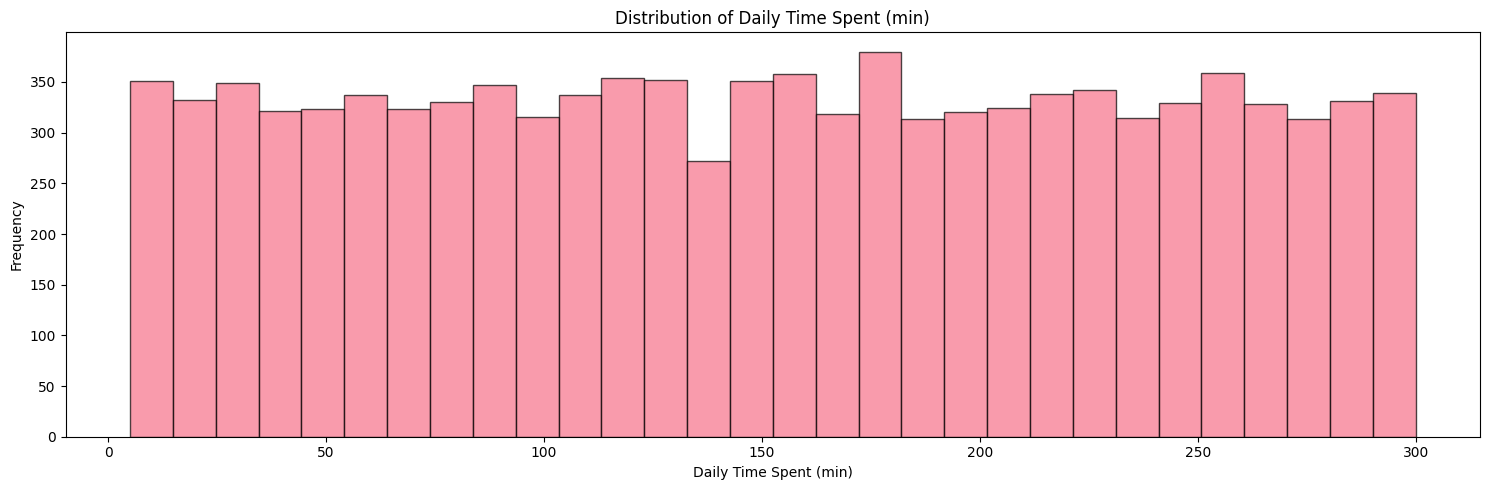

In [16]:
print("\n" + "=" * 50)
print("3. MISSING DATA ANALYSIS")
print("=" * 50)

missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
}).sort_values('Missing Count', ascending=False)

print("Missing Data Summary:")
print(missing_df[missing_df['Missing Count'] > 0])

if missing_data.sum() == 0:
    print("✓ No missing data found in the dataset!")

print("\n" + "=" * 50)
print("4. NUMERICAL FEATURES ANALYSIS")
print("=" * 50)

if numerical_features:
    print("Summary Statistics for Numerical Features:")
    print(df[numerical_features].describe())

    n_cols = min(3, len(numerical_features))
    n_rows = (len(numerical_features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if len(numerical_features) == 1 else axes
    else:
        axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        if i < len(axes):
            axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Frequency')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    if len(numerical_features) > 1:
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        if n_rows == 1:
            axes = [axes] if len(numerical_features) == 1 else axes
        else:
            axes = axes.flatten()

        for i, feature in enumerate(numerical_features):
            if i < len(axes):
                axes[i].boxplot(df[feature].dropna())
                axes[i].set_title(f'Box Plot of {feature}')
                axes[i].set_ylabel(feature)
        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()




5. CATEGORICAL FEATURES ANALYSIS

Platform Value Counts:
Platform
Reddit                  764
Instagram               745
WeChat                  742
Threads                 724
TikTok                  716
LinkedIn                710
YouTube                 709
Facebook                709
X (formerly Twitter)    706
Pinterest               704
Name: count, dtype: int64


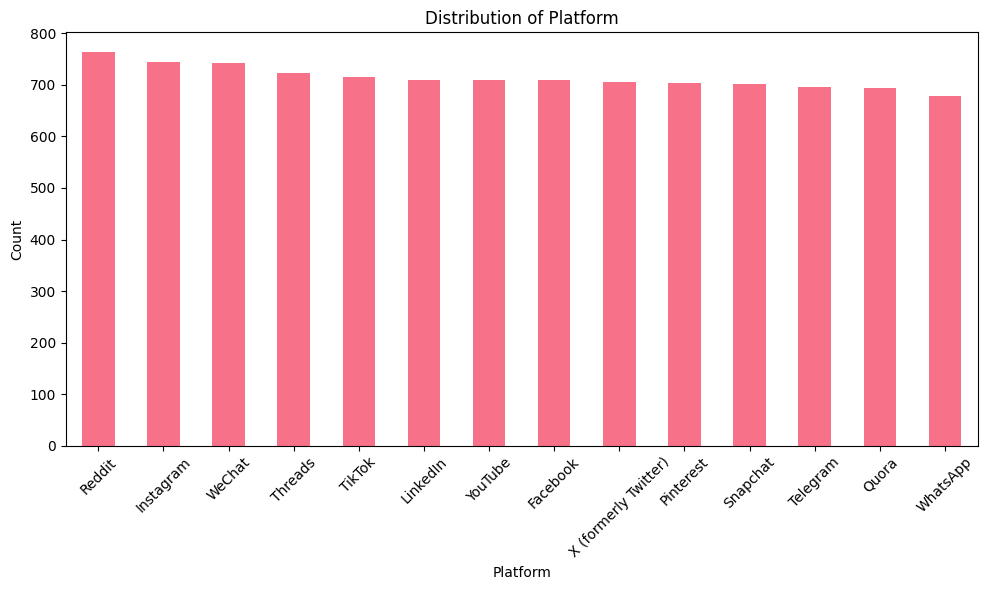


Owner Value Counts:
Owner
Meta               2857
Reddit Inc.         764
Tencent             742
ByteDance           716
Microsoft           710
Google              709
X Corp.             706
Pinterest Inc.      704
Snap Inc.           701
Telegram FZ LLC     696
Name: count, dtype: int64


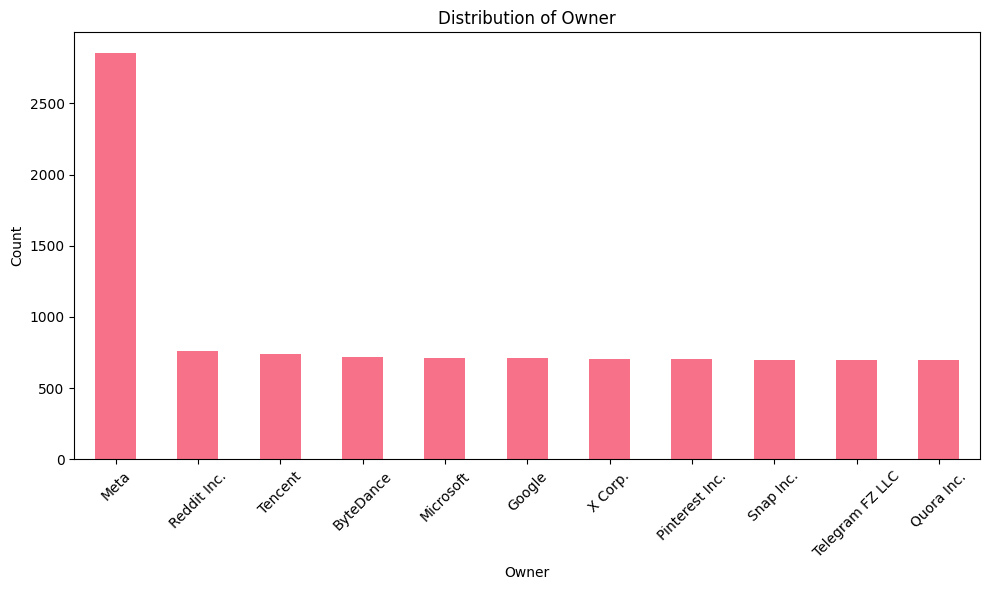


Primary Usage Value Counts:
Primary Usage
Messaging                            1375
Discussion forums and communities     764
Photo and video sharing               745
Messaging and social media            742
Text-based social networking          724
Short-form videos                     716
Professional networking               710
Video sharing                         709
Social networking                     709
Microblogging                         706
Name: count, dtype: int64


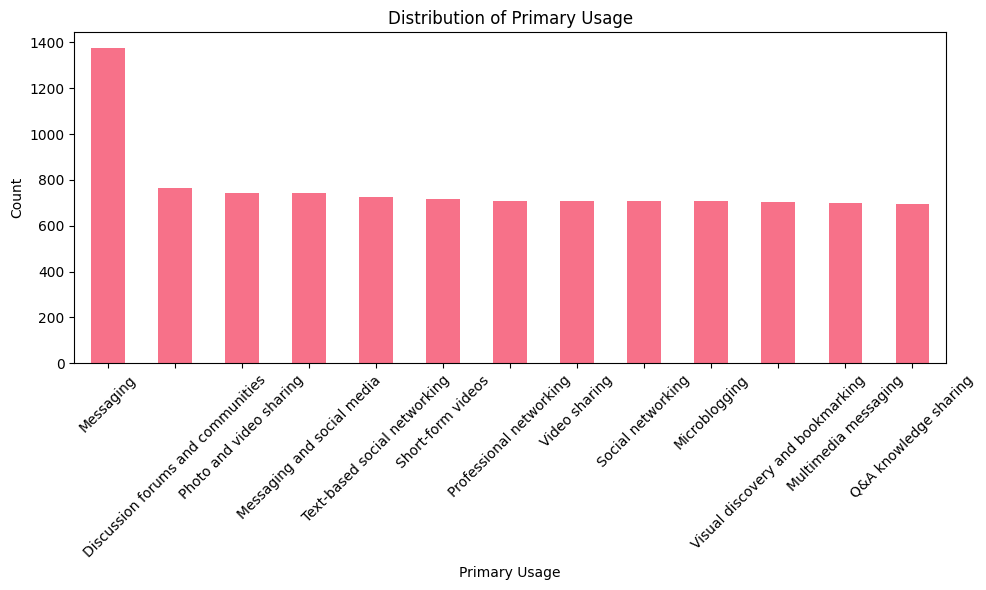


Country Value Counts:
Country
Congo              82
Korea              78
Botswana           56
Suriname           55
Armenia            54
Solomon Islands    54
Cote d'Ivoire      54
Fiji               53
Tajikistan         53
Sweden             53
Name: count, dtype: int64

Verified Account Value Counts:
Verified Account
No     5006
Yes    4994
Name: count, dtype: int64


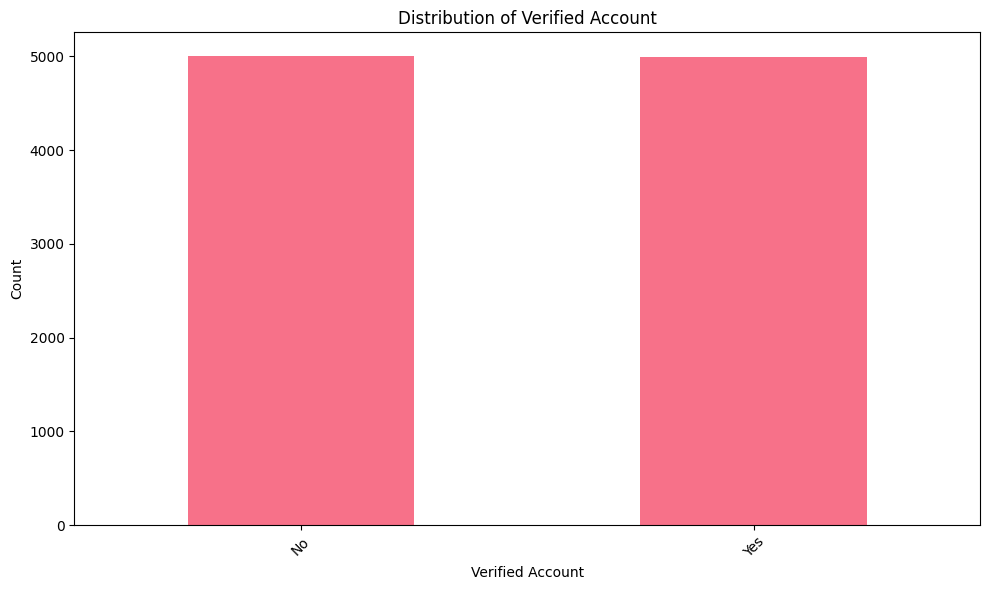


Date Joined Value Counts:
Date Joined
2022-12-22    10
2015-07-17    10
2018-05-29    10
2024-10-16     9
2020-02-20     9
2015-10-15     9
2023-08-03     9
2020-03-28     9
2018-01-04     8
2019-05-04     8
Name: count, dtype: int64

6. CORRELATION ANALYSIS


In [17]:
print("\n" + "=" * 50)
print("5. CATEGORICAL FEATURES ANALYSIS")
print("=" * 50)

if categorical_features:
    for feature in categorical_features:
        print(f"\n{feature} Value Counts:")
        value_counts = df[feature].value_counts()
        print(value_counts.head(10))

        if len(value_counts) <= 15:
            plt.figure(figsize=(10, 6))
            value_counts.plot(kind='bar')
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()


print("\n" + "=" * 50)
print("6. CORRELATION ANALYSIS")
print("=" * 50)

if len(numerical_features) > 1:

    correlation_matrix = df[numerical_features].corr()

    print("Correlation Matrix:")
    print(correlation_matrix)

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                center=0,
                square=True,
                fmt='.2f',
                cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()

    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:
                strong_correlations.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))

    if strong_correlations:
        print("\nStrong Correlations (|correlation| > 0.7):")
        for var1, var2, corr in strong_correlations:
            print(f"{var1} <-> {var2}: {corr:.3f}")




7. PLATFORM-SPECIFIC ANALYSIS
Platform Distribution:
Platform
Reddit                  764
Instagram               745
WeChat                  742
Threads                 724
TikTok                  716
LinkedIn                710
YouTube                 709
Facebook                709
X (formerly Twitter)    706
Pinterest               704
Snapchat                701
Telegram                696
Quora                   695
WhatsApp                679
Name: count, dtype: int64


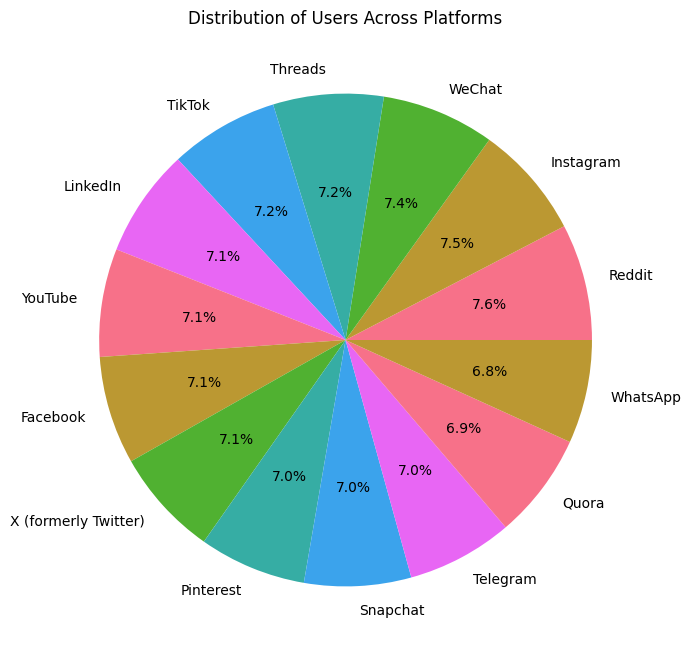

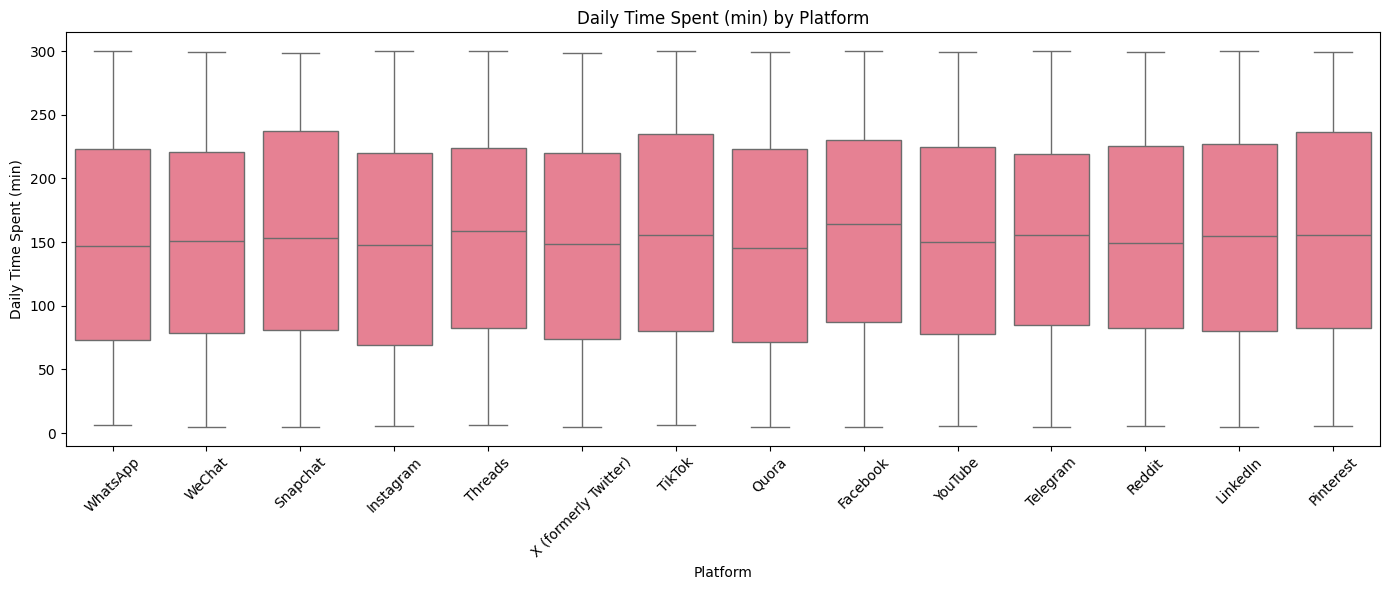

In [18]:
print("\n" + "=" * 50)
print("7. PLATFORM-SPECIFIC ANALYSIS")
print("=" * 50)

platform_col = None
for col in df.columns:
    if 'platform' in col.lower():
        platform_col = col
        break

if platform_col:
    print(f"Platform Distribution:")
    platform_counts = df[platform_col].value_counts()
    print(platform_counts)

    plt.figure(figsize=(12, 8))
    platform_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.title('Distribution of Users Across Platforms')
    plt.ylabel('')
    plt.show()

    if numerical_features:
        for num_feature in numerical_features[:3]:
            plt.figure(figsize=(14, 6))
            sns.boxplot(data=df, x=platform_col, y=num_feature)
            plt.title(f'{num_feature} by Platform')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()



In [19]:
print("\n" + "=" * 50)
print("8. STATISTICAL ANALYSIS")
print("=" * 50)

if numerical_features:
    print("Normality Tests (Shapiro-Wilk test p-values):")
    for feature in numerical_features:
        if len(df[feature].dropna()) > 5000:
            sample_data = df[feature].dropna().sample(5000)
        else:
            sample_data = df[feature].dropna()

        if len(sample_data) > 0:
            stat, p_value = stats.shapiro(sample_data)
            print(f"{feature}: p-value = {p_value:.2e} ({'Normal' if p_value > 0.05 else 'Not Normal'})")


print("\n" + "=" * 50)
print("9. OUTLIER ANALYSIS")
print("=" * 50)

if numerical_features:
    print("Outlier Analysis using IQR method:")
    outlier_summary = {}

    for feature in numerical_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100

        outlier_summary[feature] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }

        print(f"\n{feature}:")
        print(f"  Outliers: {outlier_count} ({outlier_percentage:.2f}%)")
        print(f"  Lower bound: {lower_bound:.2f}")
        print(f"  Upper bound: {upper_bound:.2f}")




8. STATISTICAL ANALYSIS
Normality Tests (Shapiro-Wilk test p-values):
Daily Time Spent (min): p-value = 5.01e-37 (Not Normal)

9. OUTLIER ANALYSIS
Outlier Analysis using IQR method:

Daily Time Spent (min):
  Outliers: 0 (0.00%)
  Lower bound: -141.16
  Upper bound: 445.73


In [20]:
print("\n" + "=" * 60)
print("10. KEY INSIGHTS & RECOMMENDATIONS FOR MODELING")
print("=" * 60)

print("\n📊 Dataset Summary:")
print(f"✓ Dataset contains {df.shape[0]:,} records and {df.shape[1]} features")
print(f"✓ {len(numerical_features)} numerical and {len(categorical_features)} categorical features")
print(f"✓ Data completeness: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.1f}%")

print("\n🔍 Key Findings:")
if numerical_features:
    for feature in numerical_features[:3]:
        mean_val = df[feature].mean()
        std_val = df[feature].std()
        print(f"• {feature}: Mean = {mean_val:.2f}, Std = {std_val:.2f}")

print("\n🎯 Recommendations for Feature Engineering & Modeling:")
print("• Consider feature scaling/normalization for numerical variables")
print("• Evaluate outlier treatment strategies")
print("• Apply encoding techniques for categorical variables")

strong_correlations = []


if strong_correlations:
    print("• Address multicollinearity issues with highly correlated features")

print("• Consider platform-specific feature engineering")
print("• Explore time-based features if datetime columns are available")

print("\n" + "=" * 60)
print("EDA ANALYSIS COMPLETE!")
print("=" * 60)


10. KEY INSIGHTS & RECOMMENDATIONS FOR MODELING

📊 Dataset Summary:
✓ Dataset contains 10,000 records and 7 features
✓ 1 numerical and 6 categorical features
✓ Data completeness: 100.0%

🔍 Key Findings:
• Daily Time Spent (min): Mean = 152.21, Std = 85.14

🎯 Recommendations for Feature Engineering & Modeling:
• Consider feature scaling/normalization for numerical variables
• Evaluate outlier treatment strategies
• Apply encoding techniques for categorical variables
• Consider platform-specific feature engineering
• Explore time-based features if datetime columns are available

EDA ANALYSIS COMPLETE!


=============================================================================
# TASK 2: PROBLEM FORMULATION AND BASELINE MODELING - STEP BY STEP
 =============================================================================

In [21]:
print("=" * 80)
print("TASK 2: PROBLEM FORMULATION AND BASELINE MODELING")
print("=" * 80)


print("\n📦 STEP 1: IMPORTING LIBRARIES...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, classification_report, confusion_matrix,
                           roc_auc_score, roc_curve)
import warnings
warnings.filterwarnings('ignore')

print("Installing XGBoost and LightGBM if needed...")
try:
    import xgboost as xgb
    import lightgbm as lgb
    print("✓ XGBoost and LightGBM already available")
except ImportError:
    print("Installing packages...")
    !pip install xgboost lightgbm
    import xgboost as xgb
    import lightgbm as lgb
    print("✓ XGBoost and LightGBM installed successfully")




TASK 2: PROBLEM FORMULATION AND BASELINE MODELING

📦 STEP 1: IMPORTING LIBRARIES...
Installing XGBoost and LightGBM if needed...
✓ XGBoost and LightGBM already available


**PROBLEM FORMULATION**

In [22]:
print("\n" + "=" * 60)
print("🎯 STEP 3: PROBLEM FORMULATION...")

print("\n📋 BUSINESS PROBLEM:")
print("Predict whether a social media user will have a verified account")
print("based on their usage patterns and platform behavior.")


target_column = 'Verified Account'

print(f"\n🎯 TARGET VARIABLE: '{target_column}'")
print("📊 TARGET DISTRIBUTION:")


if target_column not in df.columns:
    print(f"❌ ERROR: Column '{target_column}' not found!")
    print(f"Available columns: {list(df.columns)}")
    print("Please update the target_column variable above")
else:
    target_dist = df[target_column].value_counts()
    target_prop = df[target_column].value_counts(normalize=True)

    print("Absolute counts:")
    print(target_dist)
    print("\nPercentages:")
    for idx, val in target_prop.items():
        print(f"  {idx}: {val:.1%}")

    minority_class = target_prop.min()
    majority_class = target_prop.max()
    imbalance_ratio = majority_class / minority_class

    print(f"\n⚖️ CLASS BALANCE:")
    print(f"  Majority class: {majority_class:.1%}")
    print(f"  Minority class: {minority_class:.1%}")
    print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1")

    if imbalance_ratio > 1.5:
        print("  ⚠️  Dataset shows class imbalance")
    else:
        print("  ✓ Dataset is relatively balanced")





🎯 STEP 3: PROBLEM FORMULATION...

📋 BUSINESS PROBLEM:
Predict whether a social media user will have a verified account
based on their usage patterns and platform behavior.

🎯 TARGET VARIABLE: 'Verified Account'
📊 TARGET DISTRIBUTION:
Absolute counts:
Verified Account
No     5006
Yes    4994
Name: count, dtype: int64

Percentages:
  No: 50.1%
  Yes: 49.9%

⚖️ CLASS BALANCE:
  Majority class: 50.1%
  Minority class: 49.9%
  Imbalance ratio: 1.00:1
  ✓ Dataset is relatively balanced



 DEFINE EVALUATION METRICS


In [23]:
print("\n" + "=" * 60)
print("📏 STEP 4: EVALUATION METRICS...")

print("\n🔹 PRIMARY METRICS:")
print("  • F1-Score: Harmonic mean of precision and recall")
print("  • Accuracy: Overall correctness of predictions")
print("  • ROC-AUC: Area under ROC curve")

print("\n🔹 SECONDARY METRICS:")
print("  • Precision: True Positives / (True Positives + False Positives)")
print("  • Recall: True Positives / (True Positives + False Negatives)")

print("\n💼 BUSINESS JUSTIFICATION:")
print("  • F1-Score is primary metric (handles class imbalance)")
print("  • ROC-AUC for threshold-independent evaluation")
print("  • Precision to minimize false verification predictions")



📏 STEP 4: EVALUATION METRICS...

🔹 PRIMARY METRICS:
  • F1-Score: Harmonic mean of precision and recall
  • Accuracy: Overall correctness of predictions
  • ROC-AUC: Area under ROC curve

🔹 SECONDARY METRICS:
  • Precision: True Positives / (True Positives + False Positives)
  • Recall: True Positives / (True Positives + False Negatives)

💼 BUSINESS JUSTIFICATION:
  • F1-Score is primary metric (handles class imbalance)
  • ROC-AUC for threshold-independent evaluation
  • Precision to minimize false verification predictions


**DATA PREPROCESSING**

In [24]:
print("\n" + "=" * 60)
print("🔧 STEP 5: DATA PREPROCESSING...")


df_model = df.copy()
print("Created modeling copy of dataset")

if df_model[target_column].dtype == 'object':
    le_target = LabelEncoder()
    df_model[target_column] = le_target.fit_transform(df_model[target_column])
    target_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))
    print(f"Target encoded: {target_mapping}")


feature_columns = [col for col in df_model.columns if col != target_column]
print(f"\n🔧 FEATURES ({len(feature_columns)}):")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

X = df_model[feature_columns].copy()
y = df_model[target_column].copy()

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 FEATURE TYPES:")
print(f"  • Numerical: {len(numerical_cols)} features")
print(f"  • Categorical: {len(categorical_cols)} features")
if categorical_cols:
    print(f"\n🏷️  ENCODING CATEGORICAL VARIABLES:")
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"  ✓ {col}: {X[col].nunique()} unique values")

print(f"\n✓ Final feature matrix: {X.shape}")
print(f"✓ Target vector: {y.shape}")






🔧 STEP 5: DATA PREPROCESSING...
Created modeling copy of dataset
Target encoded: {'No': np.int64(0), 'Yes': np.int64(1)}

🔧 FEATURES (6):
  1. Platform
  2. Owner
  3. Primary Usage
  4. Country
  5. Daily Time Spent (min)
  6. Date Joined

📊 FEATURE TYPES:
  • Numerical: 1 features
  • Categorical: 5 features

🏷️  ENCODING CATEGORICAL VARIABLES:
  ✓ Platform: 14 unique values
  ✓ Owner: 11 unique values
  ✓ Primary Usage: 13 unique values
  ✓ Country: 243 unique values
  ✓ Date Joined: 3423 unique values

✓ Final feature matrix: (10000, 6)
✓ Target vector: (10000,)


**TRAIN-TEST SPLIT**

In [25]:
print("\n" + "=" * 60)
print("✂️  STEP 6: TRAIN-TEST SPLIT...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X):.1%})")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X):.1%})")

print(f"\n📊 CLASS DISTRIBUTION CHECK:")
print(f"Original  : {y.value_counts(normalize=True).sort_index().values}")
print(f"Train set : {y_train.value_counts(normalize=True).sort_index().values}")
print(f"Test set  : {y_test.value_counts(normalize=True).sort_index().values}")



print("\n" + "=" * 60)
print("⚖️  STEP 7: FEATURE SCALING...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")
print("✓ Scaled features ready for distance-based algorithms")

print("\n" + "=" * 60)
print("🔬 STEP 8: SETTING UP EVALUATION...")


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("✓ 5-fold stratified cross-validation configured")

def evaluate_model(model, X_train_data, X_test_data, y_train, y_test, model_name):
    """Comprehensive model evaluation function"""

    model.fit(X_train_data, y_train)


    y_pred = model.predict(X_test_data)
    y_pred_proba = model.predict_proba(X_test_data)[:, 1] if hasattr(model, 'predict_proba') else None


    results = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='binary'),
        'recall': recall_score(y_test, y_pred, average='binary'),
        'f1': f1_score(y_test, y_pred, average='binary'),
        'roc_auc': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }

    try:
        cv_scores = cross_val_score(model, X_train_data, y_train, cv=cv, scoring='f1')
        results['cv_f1_mean'] = cv_scores.mean()
        results['cv_f1_std'] = cv_scores.std()
    except:
        results['cv_f1_mean'] = None
        results['cv_f1_std'] = None

    return results, y_pred, y_pred_proba

print("✓ Model evaluation function defined")





✂️  STEP 6: TRAIN-TEST SPLIT...
Training set: 8,000 samples (80.0%)
Test set: 2,000 samples (20.0%)

📊 CLASS DISTRIBUTION CHECK:
Original  : [0.5006 0.4994]
Train set : [0.500625 0.499375]
Test set  : [0.5005 0.4995]

⚖️  STEP 7: FEATURE SCALING...
✓ Features scaled using StandardScaler
✓ Scaled features ready for distance-based algorithms

🔬 STEP 8: SETTING UP EVALUATION...
✓ 5-fold stratified cross-validation configured
✓ Model evaluation function defined


# ***BASELINE MODELS - PART 1 (SIMPLE MODELS)***

In [26]:
print("\n" + "=" * 60)
print("🤖 STEP 9: BASELINE MODELS - SIMPLE MODELS...")

baseline_results = {}

print("\n🔹 MODEL 1: DUMMY CLASSIFIER (Most Frequent)")
print("-" * 50)
dummy_freq = DummyClassifier(strategy='most_frequent', random_state=42)
results_dummy, pred_dummy, _ = evaluate_model(
    dummy_freq, X_train, X_test, y_train, y_test, "Dummy"
)
baseline_results['Dummy_Classifier'] = results_dummy
print(f"✓ Accuracy: {results_dummy['accuracy']:.4f}")
print(f"✓ F1-Score: {results_dummy['f1']:.4f}")

print("\n🔹 MODEL 2: LOGISTIC REGRESSION")
print("-" * 50)
logreg = LogisticRegression(random_state=42, max_iter=1000)
results_lr, pred_lr, prob_lr = evaluate_model(
    logreg, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression"
)
baseline_results['Logistic_Regression'] = results_lr
print(f"✓ Accuracy: {results_lr['accuracy']:.4f}")
print(f"✓ F1-Score: {results_lr['f1']:.4f}")
print(f"✓ ROC-AUC: {results_lr['roc_auc']:.4f}")

print("\n🔹 MODEL 3: NAIVE BAYES")
print("-" * 50)
nb = GaussianNB()
results_nb, pred_nb, prob_nb = evaluate_model(
    nb, X_train_scaled, X_test_scaled, y_train, y_test, "Naive Bayes"
)
baseline_results['Naive_Bayes'] = results_nb
print(f"✓ Accuracy: {results_nb['accuracy']:.4f}")
print(f"✓ F1-Score: {results_nb['f1']:.4f}")
print(f"✓ ROC-AUC: {results_nb['roc_auc']:.4f}")

print("✅ STEP 9 COMPLETE: Simple models evaluated")



🤖 STEP 9: BASELINE MODELS - SIMPLE MODELS...

🔹 MODEL 1: DUMMY CLASSIFIER (Most Frequent)
--------------------------------------------------
✓ Accuracy: 0.5005
✓ F1-Score: 0.0000

🔹 MODEL 2: LOGISTIC REGRESSION
--------------------------------------------------
✓ Accuracy: 0.4945
✓ F1-Score: 0.4829
✓ ROC-AUC: 0.4913

🔹 MODEL 3: NAIVE BAYES
--------------------------------------------------
✓ Accuracy: 0.4885
✓ F1-Score: 0.4413
✓ ROC-AUC: 0.4846
✅ STEP 9 COMPLETE: Simple models evaluated


# ***BASELINE MODELS - PART 2 (TREE-BASED MODELS)***

In [27]:
print("\n" + "=" * 60)
print("🌳 STEP 10: BASELINE MODELS - TREE-BASED MODELS...")

print("\n🔹 MODEL 4: DECISION TREE")
print("-" * 50)
dt = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_split=20)
results_dt, pred_dt, prob_dt = evaluate_model(
    dt, X_train, X_test, y_train, y_test, "Decision Tree"
)
baseline_results['Decision_Tree'] = results_dt
print(f"✓ Accuracy: {results_dt['accuracy']:.4f}")
print(f"✓ F1-Score: {results_dt['f1']:.4f}")
print(f"✓ ROC-AUC: {results_dt['roc_auc']:.4f}")

print("\n🔹 MODEL 5: RANDOM FOREST")
print("-" * 50)
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)
results_rf, pred_rf, prob_rf = evaluate_model(
    rf, X_train, X_test, y_train, y_test, "Random Forest"
)
baseline_results['Random_Forest'] = results_rf
print(f"✓ Accuracy: {results_rf['accuracy']:.4f}")
print(f"✓ F1-Score: {results_rf['f1']:.4f}")
print(f"✓ ROC-AUC: {results_rf['roc_auc']:.4f}")





🌳 STEP 10: BASELINE MODELS - TREE-BASED MODELS...

🔹 MODEL 4: DECISION TREE
--------------------------------------------------
✓ Accuracy: 0.4910
✓ F1-Score: 0.3890
✓ ROC-AUC: 0.4990

🔹 MODEL 5: RANDOM FOREST
--------------------------------------------------
✓ Accuracy: 0.5065
✓ F1-Score: 0.5234
✓ ROC-AUC: 0.5039


# ***BASELINE MODELS - PART 3 (DISTANCE-BASED MODELS)***

In [28]:
print("\n" + "=" * 60)
print("📏 STEP 11: BASELINE MODELS - DISTANCE-BASED MODELS...")

print("\n🔹 MODEL 6: SUPPORT VECTOR MACHINE")
print("-" * 50)
svm = SVC(random_state=42, probability=True, kernel='rbf', C=1.0)
results_svm, pred_svm, prob_svm = evaluate_model(
    svm, X_train_scaled, X_test_scaled, y_train, y_test, "SVM"
)
baseline_results['SVM'] = results_svm
print(f"✓ Accuracy: {results_svm['accuracy']:.4f}")
print(f"✓ F1-Score: {results_svm['f1']:.4f}")
print(f"✓ ROC-AUC: {results_svm['roc_auc']:.4f}")

print("\n🔹 MODEL 7: K-NEAREST NEIGHBORS")
print("-" * 50)
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
results_knn, pred_knn, prob_knn = evaluate_model(
    knn, X_train_scaled, X_test_scaled, y_train, y_test, "KNN"
)
baseline_results['KNN'] = results_knn
print(f"✓ Accuracy: {results_knn['accuracy']:.4f}")
print(f"✓ F1-Score: {results_knn['f1']:.4f}")
print(f"✓ ROC-AUC: {results_knn['roc_auc']:.4f}")





📏 STEP 11: BASELINE MODELS - DISTANCE-BASED MODELS...

🔹 MODEL 6: SUPPORT VECTOR MACHINE
--------------------------------------------------
✓ Accuracy: 0.4870
✓ F1-Score: 0.4722
✓ ROC-AUC: 0.5000

🔹 MODEL 7: K-NEAREST NEIGHBORS
--------------------------------------------------
✓ Accuracy: 0.5150
✓ F1-Score: 0.5126
✓ ROC-AUC: 0.5095


# ***BASELINE MODELS - PART 4 (BOOSTING MODELS)***

In [29]:
print("\n" + "=" * 60)
print("🚀 STEP 12: BASELINE MODELS - BOOSTING MODELS...")

print("\n🔹 MODEL 8: ADABOOST")
print("-" * 50)
ada = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=1.0)
results_ada, pred_ada, prob_ada = evaluate_model(
    ada, X_train, X_test, y_train, y_test, "AdaBoost"
)
baseline_results['AdaBoost'] = results_ada
print(f"✓ Accuracy: {results_ada['accuracy']:.4f}")
print(f"✓ F1-Score: {results_ada['f1']:.4f}")
print(f"✓ ROC-AUC: {results_ada['roc_auc']:.4f}")

print("\n🔹 MODEL 9: XGBOOST")
print("-" * 50)
xgb_model = xgb.XGBClassifier(
    n_estimators=100, random_state=42, learning_rate=0.1,
    max_depth=6, eval_metric='logloss'
)
results_xgb, pred_xgb, prob_xgb = evaluate_model(
    xgb_model, X_train, X_test, y_train, y_test, "XGBoost"
)
baseline_results['XGBoost'] = results_xgb
print(f"✓ Accuracy: {results_xgb['accuracy']:.4f}")
print(f"✓ F1-Score: {results_xgb['f1']:.4f}")
print(f"✓ ROC-AUC: {results_xgb['roc_auc']:.4f}")

print("\n🔹 MODEL 10: LIGHTGBM")
print("-" * 50)
lgb_model = lgb.LGBMClassifier(
    n_estimators=100, random_state=42, learning_rate=0.1,
    max_depth=6, verbose=-1
)
results_lgb, pred_lgb, prob_lgb = evaluate_model(
    lgb_model, X_train, X_test, y_train, y_test, "LightGBM"
)
baseline_results['LightGBM'] = results_lgb
print(f"✓ Accuracy: {results_lgb['accuracy']:.4f}")
print(f"✓ F1-Score: {results_lgb['f1']:.4f}")
print(f"✓ ROC-AUC: {results_lgb['roc_auc']:.4f}")




🚀 STEP 12: BASELINE MODELS - BOOSTING MODELS...

🔹 MODEL 8: ADABOOST
--------------------------------------------------
✓ Accuracy: 0.4875
✓ F1-Score: 0.3500
✓ ROC-AUC: 0.4874

🔹 MODEL 9: XGBOOST
--------------------------------------------------
✓ Accuracy: 0.5085
✓ F1-Score: 0.5083
✓ ROC-AUC: 0.5050

🔹 MODEL 10: LIGHTGBM
--------------------------------------------------
✓ Accuracy: 0.4980
✓ F1-Score: 0.4980
✓ ROC-AUC: 0.5056


# ***BASELINE MODELS - PART 5 (NEURAL NETWORK)***

In [30]:
print("\n" + "=" * 60)
print("🧠 STEP 13: BASELINE MODELS - NEURAL NETWORK...")

print("\n🔹 MODEL 11: NEURAL NETWORK (MLP)")
print("-" * 50)
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50), random_state=42, max_iter=500,
    learning_rate_init=0.001, early_stopping=True, validation_fraction=0.1
)
results_mlp, pred_mlp, prob_mlp = evaluate_model(
    mlp, X_train_scaled, X_test_scaled, y_train, y_test, "Neural Network"
)
baseline_results['Neural_Network'] = results_mlp
print(f"✓ Accuracy: {results_mlp['accuracy']:.4f}")
print(f"✓ F1-Score: {results_mlp['f1']:.4f}")
print(f"✓ ROC-AUC: {results_mlp['roc_auc']:.4f}")





🧠 STEP 13: BASELINE MODELS - NEURAL NETWORK...

🔹 MODEL 11: NEURAL NETWORK (MLP)
--------------------------------------------------
✓ Accuracy: 0.4865
✓ F1-Score: 0.4993
✓ ROC-AUC: 0.4875


***RESULTS COMPARISON***

In [31]:
print("\n" + "=" * 60)
print("📊 STEP 14: BASELINE COMPARISON...")
comparison_df = pd.DataFrame(baseline_results).T
comparison_df = comparison_df.round(4)

print("\n📋 COMPLETE BASELINE COMPARISON:")
print("=" * 80)
print(comparison_df)

comparison_df_sorted = comparison_df.sort_values('f1', ascending=False)

print(f"\n🏆 MODEL RANKING (by F1-Score):")
print("=" * 50)
for i, (model, row) in enumerate(comparison_df_sorted.iterrows(), 1):
    f1 = row['f1']
    acc = row['accuracy']
    auc = row['roc_auc']
    print(f"{i:2d}. {model:<18} | F1: {f1:.4f} | Acc: {acc:.4f} | AUC: {auc:.4f}")





📊 STEP 14: BASELINE COMPARISON...

📋 COMPLETE BASELINE COMPARISON:
                     accuracy  precision  recall      f1  roc_auc  cv_f1_mean  \
Dummy_Classifier       0.5005     0.0000  0.0000  0.0000   0.5000      0.0000   
Logistic_Regression    0.4945     0.4937  0.4725  0.4829   0.4913      0.4826   
Naive_Bayes            0.4885     0.4856  0.4044  0.4413   0.4846      0.4677   
Decision_Tree          0.4910     0.4858  0.3243  0.3890   0.4990      0.4892   
Random_Forest          0.5065     0.5056  0.5425  0.5234   0.5039      0.5152   
SVM                    0.4870     0.4857  0.4595  0.4722   0.5000      0.4976   
KNN                    0.5150     0.5146  0.5105  0.5126   0.5095      0.4871   
AdaBoost               0.4875     0.4775  0.2763  0.3500   0.4874      0.3430   
XGBoost                0.5085     0.5080  0.5085  0.5083   0.5050      0.5069   
LightGBM               0.4980     0.4975  0.4985  0.4980   0.5056      0.5013   
Neural_Network         0.4865     0.4867 

***VISUALIZATION***


📈 STEP 15: CREATING VISUALIZATIONS...


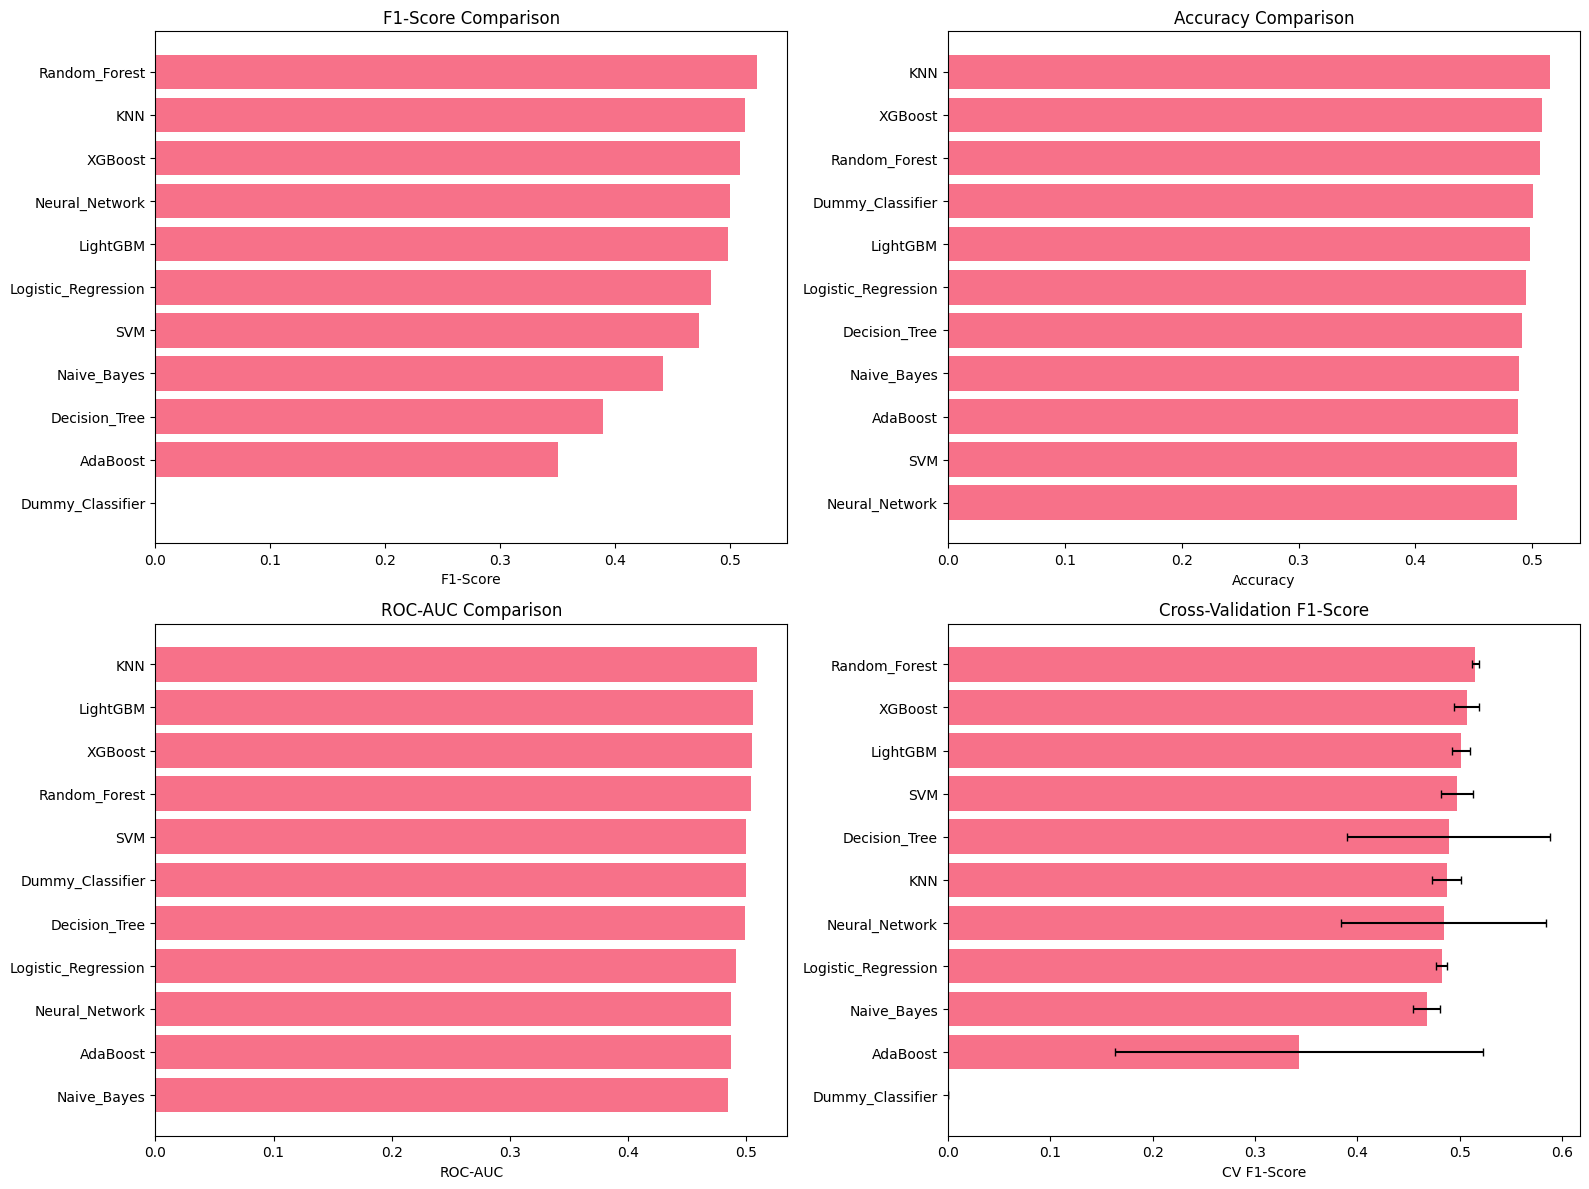

✓ Performance comparison plots created

🥇 STEP 16: BEST MODEL ANALYSIS...

🏆 BEST BASELINE MODEL: Random_Forest
🎯 F1-Score: 0.5234
🎯 Accuracy: 0.5065
🎯 ROC-AUC: 0.5039


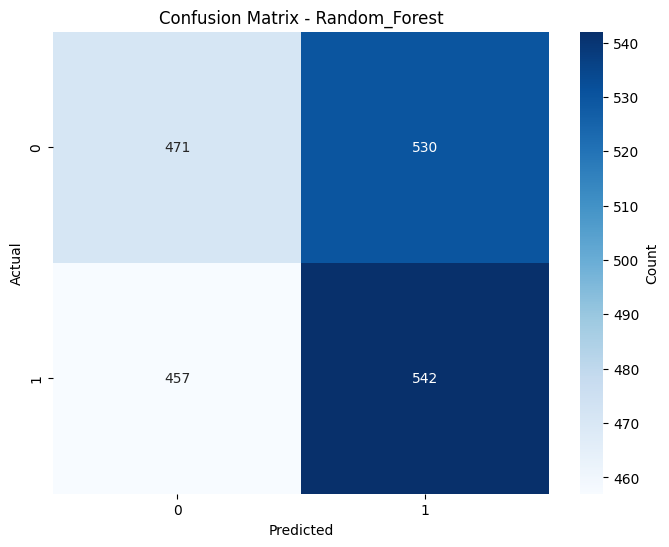


📋 CLASSIFICATION REPORT (Random_Forest):
              precision    recall  f1-score   support

           0       0.51      0.47      0.49      1001
           1       0.51      0.54      0.52       999

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



In [32]:
print("\n" + "=" * 60)
print("📈 STEP 15: CREATING VISUALIZATIONS...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

comparison_df_sorted_f1 = comparison_df.sort_values('f1', ascending=True)
bars1 = axes[0, 0].barh(range(len(comparison_df_sorted_f1)), comparison_df_sorted_f1['f1'])
axes[0, 0].set_yticks(range(len(comparison_df_sorted_f1)))
axes[0, 0].set_yticklabels(comparison_df_sorted_f1.index, fontsize=10)
axes[0, 0].set_title('F1-Score Comparison')
axes[0, 0].set_xlabel('F1-Score')

comparison_df_sorted_acc = comparison_df.sort_values('accuracy', ascending=True)
bars2 = axes[0, 1].barh(range(len(comparison_df_sorted_acc)), comparison_df_sorted_acc['accuracy'])
axes[0, 1].set_yticks(range(len(comparison_df_sorted_acc)))
axes[0, 1].set_yticklabels(comparison_df_sorted_acc.index, fontsize=10)
axes[0, 1].set_title('Accuracy Comparison')
axes[0, 1].set_xlabel('Accuracy')

roc_data = comparison_df['roc_auc'].dropna().sort_values(ascending=True)
bars3 = axes[1, 0].barh(range(len(roc_data)), roc_data.values)
axes[1, 0].set_yticks(range(len(roc_data)))
axes[1, 0].set_yticklabels(roc_data.index, fontsize=10)
axes[1, 0].set_title('ROC-AUC Comparison')
axes[1, 0].set_xlabel('ROC-AUC')

cv_data = comparison_df[['cv_f1_mean', 'cv_f1_std']].dropna().sort_values('cv_f1_mean', ascending=True)
bars4 = axes[1, 1].barh(range(len(cv_data)), cv_data['cv_f1_mean'],
                       xerr=cv_data['cv_f1_std'], capsize=3)
axes[1, 1].set_yticks(range(len(cv_data)))
axes[1, 1].set_yticklabels(cv_data.index, fontsize=10)
axes[1, 1].set_title('Cross-Validation F1-Score')
axes[1, 1].set_xlabel('CV F1-Score')

plt.tight_layout()
plt.show()

print("✓ Performance comparison plots created")


print("\n" + "=" * 60)
print("🥇 STEP 16: BEST MODEL ANALYSIS...")

best_model_name = comparison_df_sorted.index[0]
best_f1_score = comparison_df_sorted.iloc[0]['f1']
best_accuracy = comparison_df_sorted.iloc[0]['accuracy']
best_auc = comparison_df_sorted.iloc[0]['roc_auc']

print(f"\n🏆 BEST BASELINE MODEL: {best_model_name}")
print(f"🎯 F1-Score: {best_f1_score:.4f}")
print(f"🎯 Accuracy: {best_accuracy:.4f}")
print(f"🎯 ROC-AUC: {best_auc:.4f}")



model_predictions = {
    'Dummy_Classifier': pred_dummy,
    'Logistic_Regression': pred_lr,
    'Naive_Bayes': pred_nb,
    'Decision_Tree': pred_dt,
    'Random_Forest': pred_rf,
    'SVM': pred_svm,
    'KNN': pred_knn,
    'AdaBoost': pred_ada,
    'XGBoost': pred_xgb,
    'LightGBM': pred_lgb,
    'Neural_Network': pred_mlp
}

best_pred = model_predictions[best_model_name]

cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"\n📋 CLASSIFICATION REPORT ({best_model_name}):")
print(classification_report(y_test, best_pred))




***SUCCESS CRITERIA AND RECOMMENDATIONS***

In [33]:
print("\n" + "=" * 60)
print("🎯 STEP 17: SUCCESS CRITERIA AND NEXT STEPS...")

print(f"\n✅ BASELINE ESTABLISHMENT SUMMARY:")
print(f"• Total models evaluated: {len(baseline_results)}")
print(f"• Best performing model: {best_model_name}")
print(f"• Best F1-Score achieved: {best_f1_score:.4f}")
print(f"• Performance range: {comparison_df['f1'].min():.4f} - {comparison_df['f1'].max():.4f}")

print(f"\n🎯 SUCCESS CRITERIA FOR ADVANCED MODELS:")
target_f1 = best_f1_score + 0.05
target_acc = best_accuracy + 0.03
target_auc = best_auc + 0.02

print(f"• Target F1-Score: > {target_f1:.4f} (+5% improvement)")
print(f"• Target Accuracy: > {target_acc:.4f} (+3% improvement)")
print(f"• Target ROC-AUC: > {target_auc:.4f} (+2% improvement)")
print(f"• Statistical significance: p-value < 0.05")

print(f"\n🚀 RECOMMENDED NEXT STEPS:")
print("• Hyperparameter tuning for best performing models")
print("• Feature engineering and selection")
print("• Ensemble methods (voting, stacking)")
print("• Advanced neural networks with regularization")
print("• Handle class imbalance if needed")
print("• Model interpretability analysis")


print("\n" + "=" * 80)
print("🎉 TASK 2 COMPLETE: BASELINE MODELS ESTABLISHED")
print("=" * 80)
print(f"✅ Problem formulated: Binary classification for verified accounts")
print(f"✅ Evaluation metrics defined: F1-Score, Accuracy, ROC-AUC")
print(f"✅ {len(baseline_results)} baseline models evaluated")
print(f"✅ Best baseline: {best_model_name} (F1: {best_f1_score:.4f})")
print(f"✅ Success criteria set for advanced modeling")
print(f"✅ Ready for Task 3: Feature Engineering and Model Optimization")
print("=" * 80)


🎯 STEP 17: SUCCESS CRITERIA AND NEXT STEPS...

✅ BASELINE ESTABLISHMENT SUMMARY:
• Total models evaluated: 11
• Best performing model: Random_Forest
• Best F1-Score achieved: 0.5234
• Performance range: 0.0000 - 0.5234

🎯 SUCCESS CRITERIA FOR ADVANCED MODELS:
• Target F1-Score: > 0.5734 (+5% improvement)
• Target Accuracy: > 0.5365 (+3% improvement)
• Target ROC-AUC: > 0.5239 (+2% improvement)
• Statistical significance: p-value < 0.05

🚀 RECOMMENDED NEXT STEPS:
• Hyperparameter tuning for best performing models
• Feature engineering and selection
• Ensemble methods (voting, stacking)
• Advanced neural networks with regularization
• Handle class imbalance if needed
• Model interpretability analysis

🎉 TASK 2 COMPLETE: BASELINE MODELS ESTABLISHED
✅ Problem formulated: Binary classification for verified accounts
✅ Evaluation metrics defined: F1-Score, Accuracy, ROC-AUC
✅ 11 baseline models evaluated
✅ Best baseline: Random_Forest (F1: 0.5234)
✅ Success criteria set for advanced modeling